In [13]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import seaborn as sns
# Cargamos el dataset asncombe (https://en.wikipedia.org/wiki/Anscombe%27s_quartet) que ya viene con seaborn
anscombe = sns.load_dataset("anscombe")

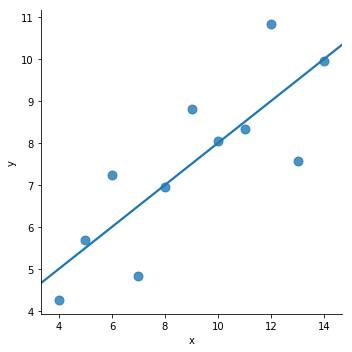

In [2]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws ={"s":80});

## Ecuacion Normal

In [4]:
# Generamos un conjunto de datos lineal de forma aleatoria
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

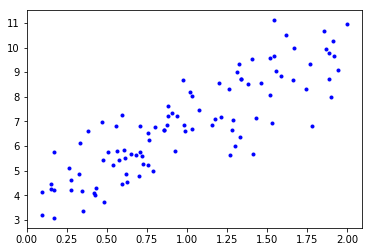

In [5]:
plt.plot(X,y, "b.")

In [6]:
X_b = np.c_[np.ones((100,1)),X]
mejores_params = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict_normal = X_new_b.dot(mejores_params)
y_predict_normal

array([[ 3.74678582],
       [10.02503233]])

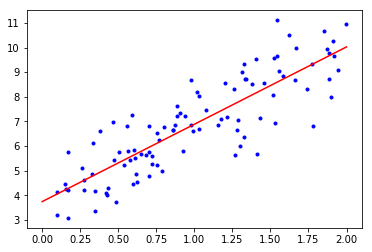

In [8]:
plt.plot(X, y,"b.")
plt.plot(X_new, y_predict_normal, "r-")

In [9]:
#Desde Scikit Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_predict = lin_reg.predict(X_new)

In [14]:
#Usando Gradiente
#Desde Scikit learn usamos el modelo SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()

In [15]:
sgd_reg.fit(X,y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [16]:
sgd_y_predict = sgd_reg.predict(X_new)

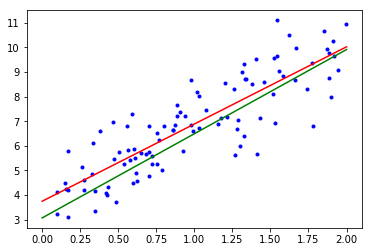

In [19]:
#Graficamos para ver la diferencia con el anterior modelo
plt.plot(X,y, "b.")
plt.plot(X_new,y_predict, "r-")
plt.plot(X_new,sgd_y_predict, "g-")
